# Preparate a cropped image of Mato Grosso

In [1]:
from pathlib import Path
import shutil
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from functions import crop_scene, load_scene, rgb_composite, save_scene

Load and crop the scene.

In [2]:
region = np.array([3000, 6000, 4000, 6500])
before = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/mato_grosso_deforestation_since_2014/LC08_L2SP_226068_20140804_20200911_02_T1/", 
        pattern="[2-5]",
    ),
    region,
)
after = crop_scene(
    load_scene(
        "/home/leo/Dropbox/leo/liverpool/ENVS258-EnvironmentalGeophysics/data/mato_grosso_deforestation_since_2014/LC08_L2SP_226068_20200804_20200915_02_T1/", 
        pattern="[2-5]",
    ),
    region,
)

Plot it to make sure it looks good.

In [3]:
rgb_before = rgb_composite(before, in_range=(5000, 18000))
rgb_after = rgb_composite(after, in_range=(5000, 18000))

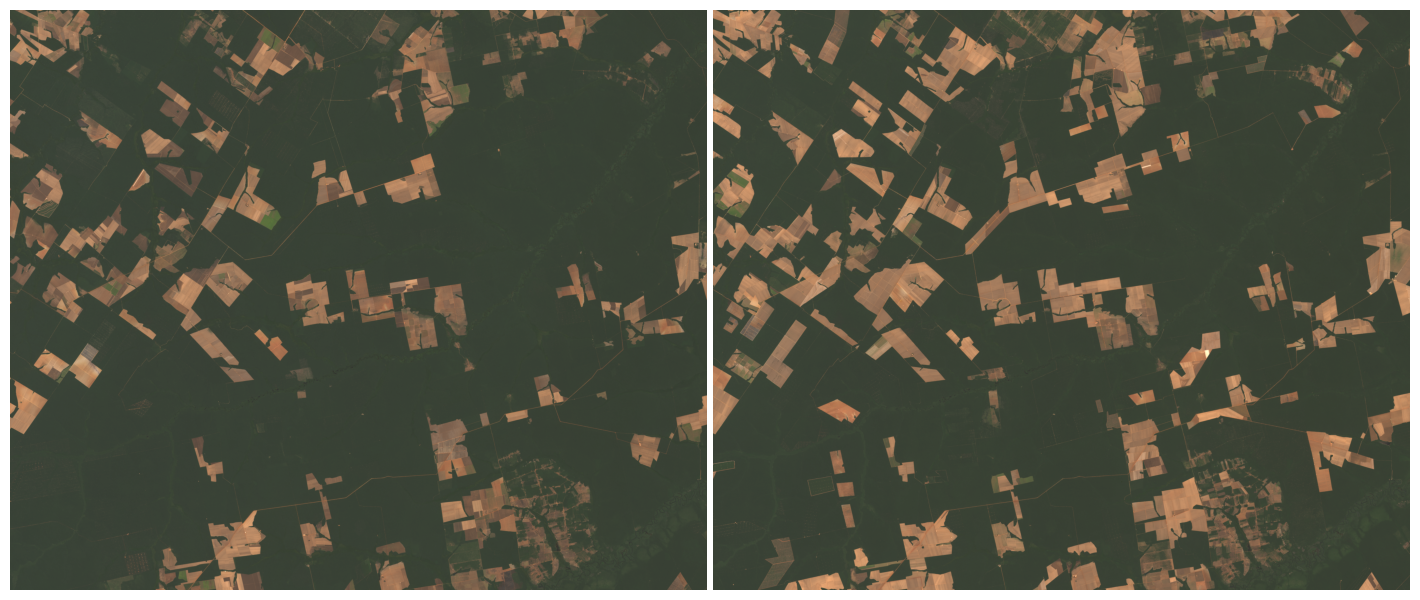

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8), dpi=100)
ax1, ax2 = axes
ax1.imshow(rgb_before)
ax2.imshow(rgb_after)
for ax in axes:
    ax.axis("off")
plt.tight_layout(pad=0, w_pad=0.5, h_pad=0)

Save the important bands of these scenes to TIF files.

In [5]:
data_folder = Path("../data/mato_grosso/")
scenes = [before, after]
destinations = [
    data_folder / "LC08_L2SP_226068_20140804_20200911_02_T1_cropped",
    data_folder / "LC08_L2SP_226068_20200804_20200915_02_T1_cropped",
]
prefixes = [
    "LC08_L2SP_226068_20140804_20200911_02_T1_",
    "LC08_L2SP_226068_20200804_20200915_02_T1_",
]
for scene, destination, prefix in zip(scenes, destinations, prefixes):
    save_scene(scene, destination, prefix)
shutil.make_archive(data_folder, format="zip", root_dir=data_folder)

/home/leo/edu/remote-sensing/code/functions.py:76: UserWarning: ../data/mato_grosso/LC08_L2SP_226068_20140804_20200911_02_T1_cropped/LC08_L2SP_226068_20140804_20200911_02_T1_B2.TIF is a low contrast image
  skimage.io.imsave(fname, scene[band])
/home/leo/edu/remote-sensing/code/functions.py:76: UserWarning: ../data/mato_grosso/LC08_L2SP_226068_20200804_20200915_02_T1_cropped/LC08_L2SP_226068_20200804_20200915_02_T1_B2.TIF is a low contrast image
  skimage.io.imsave(fname, scene[band])


'/home/leo/edu/remote-sensing/data/mato_grosso.zip'

In [9]:
! du -h ../data/mato_grosso*

58M	../data/mato_grosso/LC08_L2SP_226068_20140804_20200911_02_T1_cropped
58M	../data/mato_grosso/LC08_L2SP_226068_20200804_20200915_02_T1_cropped
115M	../data/mato_grosso
88M	../data/mato_grosso.zip
